# Topic Modelling
Topic modelling is nothing but Document clustering.<br>
Similar to KMeans, in text analytics topic modelling we have an algorithm LDA (Latent Dirichlet Allocation).<br>
No. of clusters is a Hyper parameter.

We will have a DTM of size DxV which gives two matrices of size DxK and KxV.

DxK represents document to topic matrix where k is the no. of topics.<br>
Similar to normal or uniform distribution, we have Dirichlet distribution which chooses words randomly and assigns to topic.<br>
The matrix will be frequency of words in that document in a particular topic

KxV represents topic to term matrix.
This matrix initially will have the term frequency across documents related to the topic.<br>
Later the probabilities are calculated. Based on the probability values a topic will be assigned to the token.



In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/NLP/datasets/amazon_reviews_big.csv'
data = pd.read_csv(dataset_path)
data.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000HDJXNA,1,What I recieved is not what is pictured here O...,"12 26, 2012",A29YXBFTD7QUP3,HHA,Buyer be ware,1.356480e+09
1,B006KKS7XQ,5,Excellent unit and a pretty simple install usi...,"09 20, 2013",A3IMTXFYD7CGDN,"Peter W. George ""soyflakeman""",high quality without high price,1.379635e+09
2,B002NP8XJ0,5,"I'm enjoying this keyboard, I'm getting anothe...","08 31, 2010",AXNOW20FQKHVW,B. Hayashi,Superb keyboard + solution for slow wake up an...,1.283213e+09
3,B000EITTLE,4,"Overall, this is a fantastic camera that I'm e...","02 3, 2008",A10KCAK279LO0W,"mmcwatters ""macdadi80""",One qualm: not great in low light,1.201997e+09
4,B006CRXK4S,5,These work very well with mySamsung PN64D7000 ...,"01 28, 2012",A19XXLMZXR764J,S. Garfinkle,"Work great, fit well",1.327709e+09


In [3]:
docs = data['reviewText']
docs = docs.fillna('not available')
docs = docs.str.lower().str.replace('[^a-z\s]', '')
docs

0        what i recieved is not what is pictured here o...
1        excellent unit and a pretty simple install usi...
2        im enjoying this keyboard im getting another o...
3        overall this is a fantastic camera that im ext...
4        these work very well with mysamsung pnd inch p...
                               ...                        
99995    with a mhz processor this is the fastest palm ...
99996    if you travel a lot finding the right pair of ...
99997    for some reason or another ive always had a lo...
99998    i bought this sound bar in a best buy store fo...
99999    i have a  year old garmin gps that can capture...
Name: reviewText, Length: 100000, dtype: object

In [4]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.porter import PorterStemmer

In [5]:
docs = docs.apply(remove_stopwords)

In [6]:
custom_stopwords=['like', 'us', 'the']
docs_clean = []
for doc in docs:
  doc_split = doc.split(' ')
  for word in custom_stopwords:
    if word in doc_split:
      doc_split.remove(word)
  docs_clean.append(' '.join(doc_split))

In [7]:
print(docs_clean[:3])

['recieved pictured advertized vidio cable job needed looking high quality cable buy product recieved cheap flimsy cable gold plated claim bait switch mistake order know attempt contact sender contacted seller told contact amazoncom amazoncom good refund good cable woth needed run wifes kareokee tv thing sent refund im surprised item listed high grade cable', 'excellent unit pretty simple install wiring adapter removal tools purchased kenwood quality evident look sound today bodes future extra stuff simple installjust sure frame correctly d use sharpie mark slide radio bend tabs fit snugly dash went wifes miata ill likely simpler time reports cd player pretty skipfree isnt easy sports car', 'im enjoying keyboard im getting laptop homeive year yes experience bt lag live stars instead update starssee update buy yesas said im buying bt annoyance pair device devicegreat layout excellent size superb tactile feel big advantage wireless keyboard notenetbook longer mercy high desktableairline 

In [8]:
stemmer = PorterStemmer()
docs_clean = pd.Series(stemmer.stem_documents(docs_clean))
docs_clean

0        reciev pictur advert vidio cabl job need look ...
1        excel unit pretti simpl instal wire adapt remo...
2        im enjoi keyboard im get laptop homeiv year ye...
3        overal fantast camera im extrem pleas withhowe...
4        work mysamsung pnd inch p hz d plasma hdtv bla...
                               ...                        
99995    mhz processor fastest palm platform pda market...
99996    travel lot find right pair headphon provid com...
99997    reason iv lot peripher penicillin doesnt work ...
99998    bought sound bar best bui store brand new set ...
99999    year old garmin gp captur gp satellit quickli ...
Length: 100000, dtype: object

In [9]:
docs_clean

0        reciev pictur advert vidio cabl job need look ...
1        excel unit pretti simpl instal wire adapt remo...
2        im enjoi keyboard im get laptop homeiv year ye...
3        overal fantast camera im extrem pleas withhowe...
4        work mysamsung pnd inch p hz d plasma hdtv bla...
                               ...                        
99995    mhz processor fastest palm platform pda market...
99996    travel lot find right pair headphon provid com...
99997    reason iv lot peripher penicillin doesnt work ...
99998    bought sound bar best bui store brand new set ...
99999    year old garmin gp captur gp satellit quickli ...
Length: 100000, dtype: object

## LDA algorithm expects input to be in a certain format.
Consider the below Eg:

[["This is first document"],
 ["This is second document"],
 .
 .
 ["The last document"]]

The convertion should be<br>
[[(word_id,frequency), (word_id,frequency)],
 [(word_id,frequency), (word_id,frequency)],
 .
 .
 [(word_id,frequency), (word_id,frequency)]]

 In case if the frequency is 0, then it is not stored/it is removed. To do this we have gensim libraries.


In [10]:
print(docs.head().str.split(' '))

0    [recieved, pictured, advertized, vidio, cable,...
1    [excellent, unit, pretty, simple, install, wir...
2    [im, enjoying, keyboard, im, getting, laptop, ...
3    [overall, fantastic, camera, im, extremely, pl...
4    [work, mysamsung, pnd, inch, p, hz, d, plasma,...
Name: reviewText, dtype: object


In [11]:
print(docs.head().str.split(' ').tolist())

[['recieved', 'pictured', 'advertized', 'vidio', 'cable', 'job', 'needed', 'looking', 'high', 'quality', 'cable', 'buy', 'product', 'recieved', 'cheap', 'flimsy', 'cable', 'gold', 'plated', 'claim', 'bait', 'switch', 'mistake', 'order', 'know', 'attempt', 'contact', 'sender', 'contacted', 'seller', 'told', 'contact', 'amazoncom', 'amazoncom', 'good', 'refund', 'good', 'cable', 'woth', 'needed', 'run', 'wifes', 'kareokee', 'tv', 'thing', 'sent', 'refund', 'im', 'surprised', 'item', 'listed', 'high', 'grade', 'cable'], ['excellent', 'unit', 'pretty', 'simple', 'install', 'wiring', 'adapter', 'removal', 'tools', 'purchased', 'kenwood', 'quality', 'evident', 'look', 'sound', 'today', 'bodes', 'future', 'extra', 'stuff', 'simple', 'installjust', 'sure', 'frame', 'correctly', 'd', 'use', 'sharpie', 'mark', 'slide', 'radio', 'bend', 'tabs', 'fit', 'snugly', 'dash', 'went', 'wifes', 'miata', 'ill', 'likely', 'simpler', 'time', 'reports', 'cd', 'player', 'pretty', 'skipfree', 'isnt', 'easy', 's

In [13]:
docs_words = docs.str.split(' ').tolist()

In [14]:
from gensim import corpora, models

In [15]:
dictionary = corpora.Dictionary(docs_words)

In [16]:
dictionary

In [17]:
corpus = [dictionary.doc2bow(doc) for doc in docs_words]

In [19]:
model = models.LdaModel(corpus, id2word=dictionary, num_topics=8)

## Topic to Term Relationship

In [21]:
model.print_topics()

[(0,
  '0.009*"new" + 0.009*"time" + 0.009*"amazon" + 0.008*"unit" + 0.007*"bought" + 0.006*"got" + 0.006*"buy" + 0.005*"product" + 0.005*"years" + 0.005*"year"'),
 (1,
  '0.023*"tv" + 0.011*"remote" + 0.008*"cable" + 0.008*"set" + 0.008*"use" + 0.007*"picture" + 0.007*"hdmi" + 0.007*"great" + 0.007*"radio" + 0.006*"player"'),
 (2,
  '0.022*"drive" + 0.017*"usb" + 0.012*"card" + 0.009*"use" + 0.009*"windows" + 0.009*"router" + 0.009*"gb" + 0.009*"software" + 0.007*"wireless" + 0.007*"device"'),
 (3,
  '0.041*"camera" + 0.021*"lens" + 0.009*"canon" + 0.009*"use" + 0.009*"mm" + 0.008*"quality" + 0.008*"great" + 0.008*"good" + 0.008*"pictures" + 0.008*"d"'),
 (4,
  '0.026*"case" + 0.017*"battery" + 0.014*"ipad" + 0.013*"use" + 0.011*"like" + 0.010*"tablet" + 0.009*"cover" + 0.009*"great" + 0.009*"charge" + 0.008*"phone"'),
 (5,
  '0.034*"sound" + 0.014*"speakers" + 0.013*"good" + 0.012*"headphones" + 0.012*"quality" + 0.012*"music" + 0.009*"great" + 0.009*"speaker" + 0.008*"bass" + 0.008*

<Figure size 432x288 with 0 Axes>

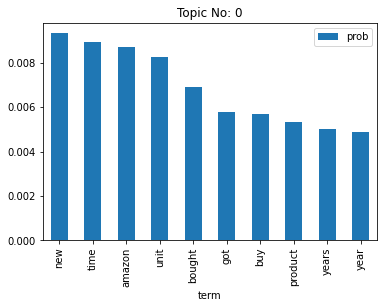

<Figure size 432x288 with 0 Axes>

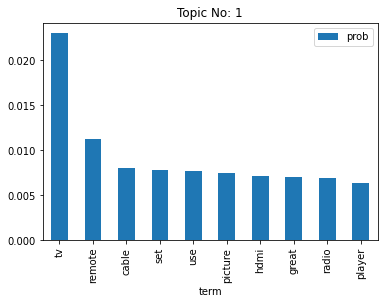

<Figure size 432x288 with 0 Axes>

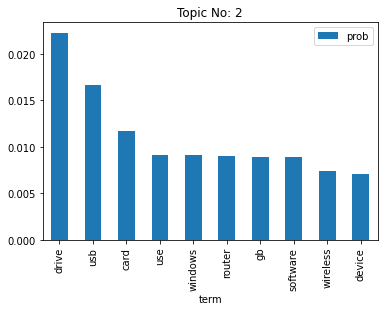

<Figure size 432x288 with 0 Axes>

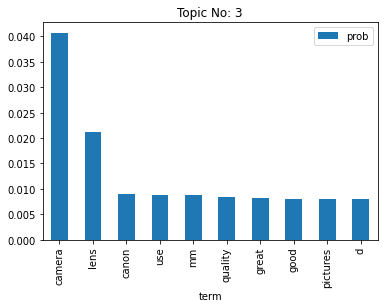

<Figure size 432x288 with 0 Axes>

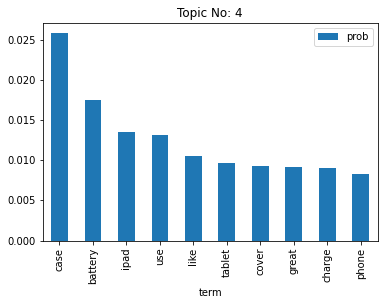

<Figure size 432x288 with 0 Axes>

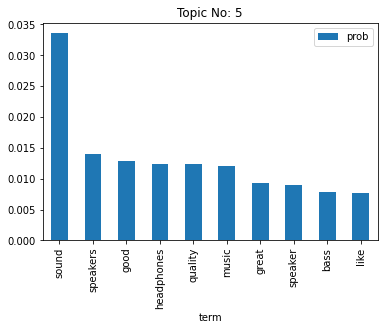

<Figure size 432x288 with 0 Axes>

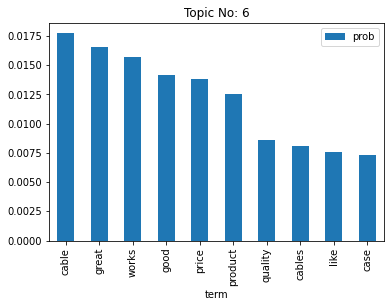

<Figure size 432x288 with 0 Axes>

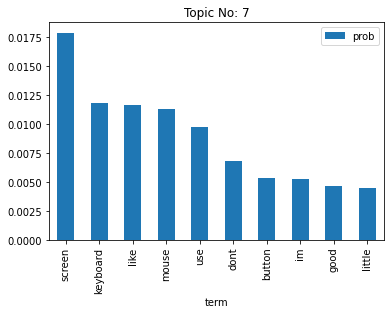

In [22]:
import matplotlib.pyplot as plt
for topic_no in range(8):
  plt.figure()
  df_topic = pd.DataFrame(model.get_topic_terms(topic_no), columns=['term_id', 'prob'])
  df_topic['term'] = df_topic['term_id'].apply(lambda v: dictionary[v])
  df_topic.plot.bar(x='term', y='prob')
  plt.title(('Topic No: %s' % topic_no));

## Document to Topic Relationship

In [23]:
docs_topics = []
for doc_bow in corpus:
  topic = pd.DataFrame(model.get_document_topics(doc_bow), 
                      columns=['topic_no', 'prob']).sort_values('prob', 
                                                                ascending=False).iloc[0]['topic_no']
  docs_topics.append(topic)

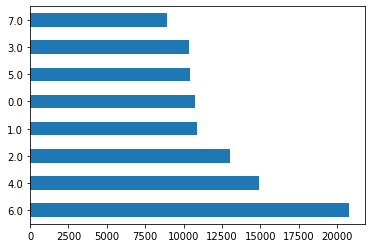

In [24]:
docs_topics_series = pd.Series(docs_topics)
docs_topics_series.value_counts().plot.barh()